In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
raw_data = pd.read_csv("datasets/hungary_chickenpox.csv")

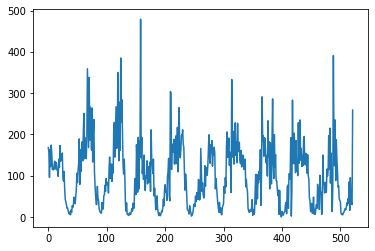

In [5]:
plt.plot( raw_data['BUDAPEST'])

In [78]:
def window(x, n, w):
    window = []
    step_ahead = []
    i = 1
    while i + n + w <= len(x):
        window.append(x[i-1:i+n-1])
        step_ahead.append(x[i+n:i+n+w])
        i += 1
    return window, step_ahead

In [79]:
x = raw_data['BUDAPEST'].values

In [80]:
windows, step_ahead = window(x[0:490], 10 ,2) #tá 11 ao inves de 10

In [81]:
windows = np.array(windows)

In [82]:
windows.shape

(478, 10)

In [83]:
windows_2 = windows.reshape(478,10,1)

In [84]:
step_ahead = np.array(step_ahead)

In [85]:
step_ahead.shape

(478, 2)

Epoch 1/350
15/15 [==============================] - 0s 15ms/step - loss: 102.8988
Epoch 2/350
15/15 [==============================] - 0s 15ms/step - loss: 102.7963
Epoch 3/350
15/15 [==============================] - 0s 14ms/step - loss: 102.6728
Epoch 4/350
15/15 [==============================] - 0s 14ms/step - loss: 102.5176
Epoch 5/350
15/15 [==============================] - 0s 14ms/step - loss: 102.3192
Epoch 6/350
15/15 [==============================] - 0s 14ms/step - loss: 102.0645
Epoch 7/350
15/15 [==============================] - 0s 14ms/step - loss: 101.7402
Epoch 8/350
15/15 [==============================] - 0s 14ms/step - loss: 101.3305
Epoch 9/350
15/15 [==============================] - 0s 14ms/step - loss: 100.8207
Epoch 10/350
15/15 [==============================] - 0s 14ms/step - loss: 100.1834
Epoch 11/350
15/15 [==============================] - 0s 16ms/step - loss: 99.3288
Epoch 12/350
15/15 [==============================] - 0s 17ms/step - loss: 97.1345
Epo

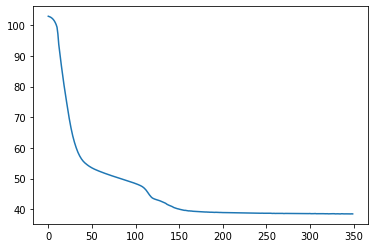

In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(2, input_shape=(10,1)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(2))
model.compile(loss='mae', optimizer='adam')

history = model.fit(windows_2, step_ahead, epochs = 350, batch_size=32, verbose=1, shuffle=False)
plt.plot(history.history['loss'])

In [89]:
model.predict(x[100:110].reshape(1, 10, 1))

array([[93.272224, 94.60262 ]], dtype=float32)

In [90]:
x[111:113]

array([106, 211], dtype=int64)

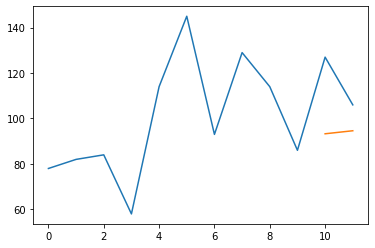

In [99]:
plt.plot(x[100:112]) #até a 112
plt.plot(range(10, 12), model.predict(x[100:110].reshape(1, 10, 1)).T) 

In [94]:
x[100:110].shape

(10,)

In [98]:
list(range(10, 12))

[10, 11]

In [45]:
raw_data['BUDAPEST'][100:113]

100     78
101     82
102     84
103     58
104    114
105    145
106     93
107    129
108    114
109     86
110    127
111    106
112    211
Name: BUDAPEST, dtype: int64

In [52]:
raw_data['BUDAPEST'][490:]

490    124
491    235
492     88
493    187
494    140
495    111
496     72
497     75
498     44
499     40
500     37
501     10
502      6
503      7
504      5
505     10
506     11
507     16
508     20
509     17
510     21
511     34
512     28
513     44
514     33
515     85
516     16
517     95
518     43
519     35
520     30
521    259
Name: BUDAPEST, dtype: int64

In [65]:
raw_data['BUDAPEST'][490:503]

490    124
491    235
492     88
493    187
494    140
495    111
496     72
497     75
498     44
499     40
500     37
501     10
502      6
Name: BUDAPEST, dtype: int64

In [100]:
model.predict(x[490:500].reshape(1, 10, 1))

array([[52.378185, 53.346592]], dtype=float32)

In [101]:
model.predict(x[490:500].reshape(1, 10, 1))

array([[52.378185, 53.346592]], dtype=float32)

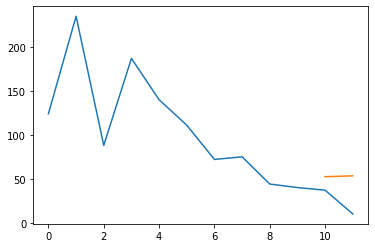

In [102]:
plt.plot(x[490:502]) #até a 112
plt.plot(range(10, 12), model.predict(x[490:500].reshape(1, 10, 1)).T) 

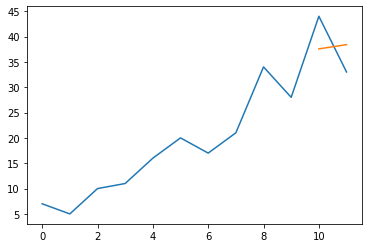

In [103]:
plt.plot(x[503:515])
plt.plot(range(10, 12), model.predict(x[503:513].reshape(1, 10, 1)).T) 